#<center>QC NKI Breath-hold task</center> 

# Purpose
NKI  data have some timing mismatch beteween the onset file and the raw data for visual and breath hold paradigm .
The announced total time in the [nki_site](http://fcon_1000.projects.nitrc.org/indi/enhanced/mri_protocol.html) is  __`10 mn`__ and here is the timing file :

``` 
Breath Hold Paradigm:
TASK_SEQUENCE = ( R, G, In, Out, Deep, H1, H2, H3, H4, H5, H6,
                  R, G, In, Out, Deep, H1, H2, H3, H4, H5, H6,
                  R, G, In, Out, Deep, H1, H2, H3, H4, H5, H6,
                  R, G, In, Out, Deep, H1, H2, H3, H4, H5, H6,
                  R, G, In, Out, Deep, H1, H2, H3, H4, H5, H6,
                  R, G, In, Out, Deep, H1, H2, H3, H4, H5, H6,
                  R, G, In, Out, Deep, H1, H2, H3, H4, H5, H6 )
TASK_TIMING =   (10, 2,  2,   2,    2,  3,  3,  3,  3,  3,  3,
                 10, 2,  2,   2,    2,  3,  3,  3,  3,  3,  3,
                 10, 2,  2,   2,    2,  3,  3,  3,  3,  3,  3,
                 10, 2,  2,   2,    2,  3,  3,  3,  3,  3,  3,
                 10, 2,  2,   2,    2,  3,  3,  3,  3,  3,  3,
                 10, 2,  2,   2,    2,  3,  3,  3,  3,  3,  3,
                 10, 2,  2,   2,    2,  3,  3,  3,  3,  3,  3 )
                 
KEY:  R="Rest"
      G="Get Ready"
      In="Breathe In"
      Out="Breathe Out"
      Deep="Deep Breath and Hold"
      H1-H6= Circles of decreasing size, indicating how much longer breath needed to be held.
```

__But here you can caluculate `70+(8×7)+(18×7)= 252÷60 = 4mn 12sec`__

Then if we check in the raw data :

``` 
ssh magma
cd /peuplier/database4/nki_enhanced/release1/raw_mnc/0102157/TfMRI_breathHold_1400
mincinfo func.mnc.gz 
file: func.mnc.gz
image: signed__ short 0 to 2659
image dimensions: time zspace yspace xspace
    dimension name         length         step        start
    --------------         ------         ----        -----
    time                      186          1.4            0
    zspace                     64            2     -11.6919
    yspace                    112            2     -92.3946
    xspace                    112           -2          112
```


__here you can calculate `186×1.4= 260.4 ÷60 = 4mn 20.4sec`__

<p><u>**To sum up, in the breath hold, the miss match here is as follow: in the website it is written 10mn, in the file 4mn 12sec and in the raw data 4mn 20.4sec. There is about 8 second difference between raw data and the onset file (let's concider that the 10mn in the website is a typo)**</u>.</p>



###Summary QC EXP
1. Plot raw EPI time series from subject 0100451
2. Plot Preprocessed EPI time series from subject 0100451
3. Plot the mean FIR for scale 15 from 40 subjects 

### 1. Raw EPI

In [12]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


`%matplotlib` prevents importing * from pylab and numpy


In [36]:
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import matplotlib.cm as cmx
import matplotlib.patches as mpatches
import nibabel as nib
import scipy.io as sio
from nilearn import plotting, image
from nilearn.image.image import mean_img
from nilearn.plotting.img_plotting import plot_epi, plot_roi

In [14]:
### Read data ################################################################
# Compute the mean EPI: we do the mean along the axis 3, which is time
func_filename = '0100451_raw/TfMRI_breathHold_1400/func.nii.gz'
fmri_img = image.smooth_img(func_filename, fwhm=6)
mean_smooth_epi = mean_img(fmri_img)

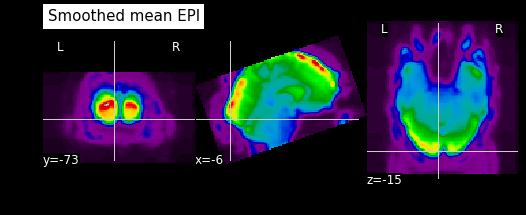

In [15]:
# Plot the mean EPI
plot_epi(mean_smooth_epi,title='Smoothed mean EPI', cut_coords=(-6,-73,-15))

In [16]:
# Data shape
in_image_raw = nib.load(func_filename)
in_vol_raw = in_image_raw.get_data()
in_vol_raw.shape

(112, 112, 64, 186)

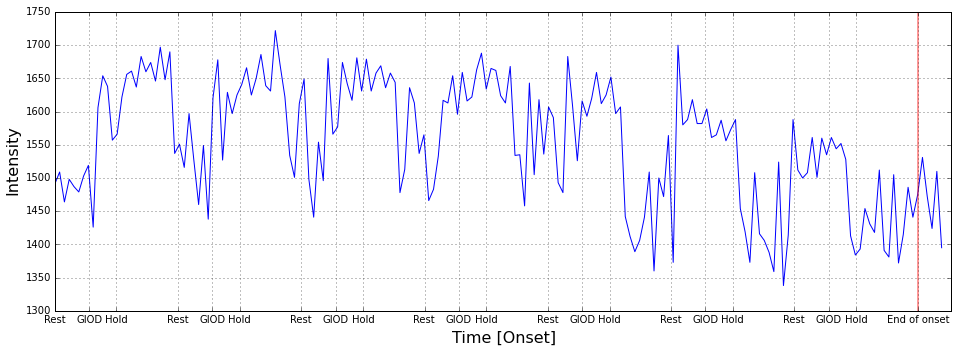

In [17]:
# plot raw time series from the the primery visual erea
time_series = in_vol_raw[53,17,32,:]
plt.figure(figsize=(15, 5))
plt.plot(time_series)
plt.xlabel('Time [Onset]', fontsize=16)
plt.ylabel('Intensity', fontsize=16)
plt.xlim(0, 187)
ticks_num =[]
ticks_labels = []
for ii in range(1, 8): #set the timing as in the onset file
    ticks_num_tmp = (np.array([0, 10,18])+(36*(ii-1)))/1.4
    ticks_num = np.concatenate([ticks_num,ticks_num_tmp])
ticks_num = np.concatenate([ticks_num,np.array([ticks_num[-1]+(18/1.4)])])
ticks_labels = ['Rest','GIOD','Hold']*7 + ['End of onset']
plt.axvline(x=ticks_num[-1], color='r',alpha=0.4, linewidth=2)
plt.xticks(ticks_num,ticks_labels)
plt.subplots_adjust(bottom=.12, top=.95, right=.95, left=.12)
plt.grid()
plt.show()

Her we can see that the onset timming (the grid) is missleading, becausse the bloc window keep sliding a bit during the hole design, until we end up the experiment with 8 sec before the real timing

### 2. Preprocessed EPI

In [18]:
### Read data ################################################################
# Compute the mean EPI: we do the mean along the axis 3, which is time
func_filename = '0100451_preproc/fmri_X0100451_sess1_breathHold1400.nii.gz'
fmri_img = image.smooth_img(func_filename, fwhm=6)
mean_smooth_epi = mean_img(fmri_img)

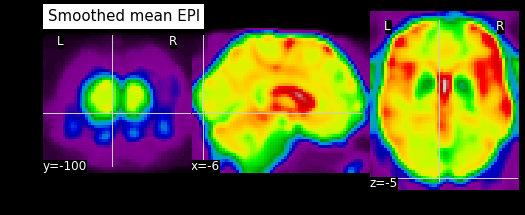

In [19]:
# Plot the mean EPI
plot_epi(mean_smooth_epi,title='Smoothed mean EPI', cut_coords=(-6,-100,-5))

In [20]:
# Data shape
in_image_raw = nib.load(func_filename)
in_vol_raw = in_image_raw.get_data()
in_vol_raw.shape

(53, 64, 52, 186)

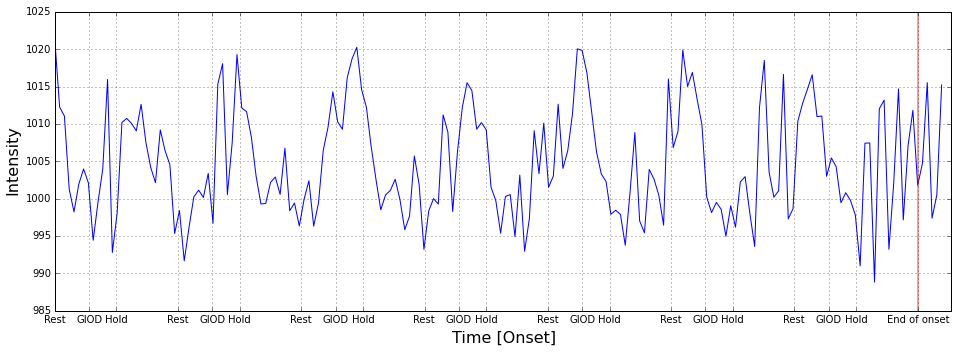

In [21]:
# plot raw time series from the the primery visual erea
time_series = in_vol_raw[25,5,22,:]
plt.figure(figsize=(15, 5))
plt.plot(time_series)
plt.xlabel('Time [Onset]', fontsize=16)
plt.ylabel('Intensity', fontsize=16)
plt.xlim(0, 187)
ticks_num =[]
ticks_labels = []
for ii in range(1, 8): #set the timing as in the onset file
    ticks_num_tmp = (np.array([0, 10,18])+(36*(ii-1)))/1.4
    ticks_num = np.concatenate([ticks_num,ticks_num_tmp])
ticks_num = np.concatenate([ticks_num,np.array([ticks_num[-1]+(18/1.4)])])
ticks_labels = ['Rest','GIOD','Hold']*7 + ['End of onset']
plt.axvline(x=ticks_num[-1], color='r',alpha=0.4, linewidth=2)
plt.xticks(ticks_num,ticks_labels)
plt.subplots_adjust(bottom=.12, top=.95, right=.95, left=.12)
plt.grid()
plt.show()

### 3. Plot FIR 

In this EXP I'm showing the mean Finite Impulse Response (FIR) from 40 subjects. I use the first 10 seconds to compute the baseline.
Here is the onset file:

In [46]:
import pandas as pd
pd.read_csv('nki_model_intrarun_breathhold_qc_timeseries.csv')

,,times,duration
0,baseline,0,10.0
1,breathhold,0,253.4


In this onset file I'm using time window of 253.4 starting from the beginning of the task. It is about 6 volumes before the end of the task

In [47]:
## load volume and fir data
in_vol=nib.load('sci15_scg15_scf15_nii/brain_partition_consensus_group_sci15_scg15_scf15.nii.gz')
fir_mat = sio.loadmat('sci15_scg15_scf15_nii/fdr_group_average_sci15_scg15_scf15.mat')
###fir
test_fir = fir_mat['test_fir']
val_test_fir = test_fir[0,0]
fir_mean = val_test_fir['mean']
fir_std = val_test_fir['std']
fir_pce = val_test_fir['pce']
fir_test = val_test_fir['test']
fir_ttest = val_test_fir['ttest']
### diff fir
test_diff = fir_mat['test_diff']
val_test_diff = test_diff[0,0]
fir_mean_diff = val_test_diff['mean']
fir_std_diff = val_test_diff['std']
fir_pce_diff = val_test_diff['pce']
fir_test_diff = val_test_diff['test']
fir_ttest_diff = val_test_diff['ttest']

In [48]:
##parameter
## plot  FIR
scale = 15
network = 13

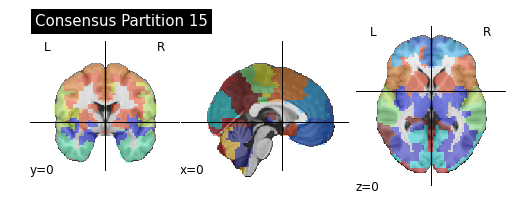

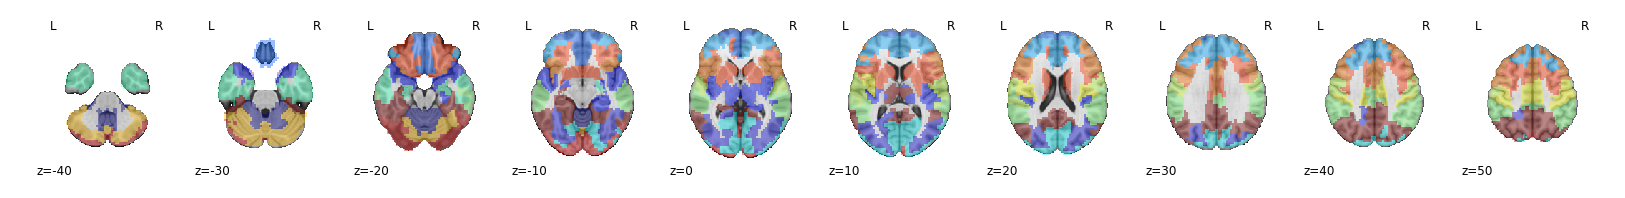

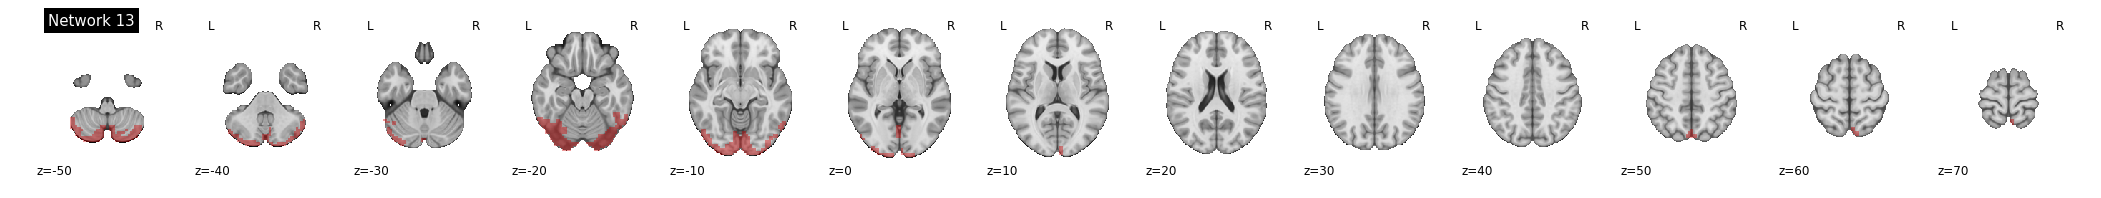

In [49]:
## Display partitions
display = plotting.plot_anat('../database/white_template.nii.gz',
                             colorbar=False,
                             title="Consensus Partition %i"%(scale),
                             cut_coords=(0,0,0))

display.add_overlay(in_vol,cmap=cm.jet,alpha=0.4)
display = plotting.plot_anat('../database/white_template.nii.gz',
                             colorbar=False,
                             display_mode='z',
                             cut_coords= range(-40, 60, 10) 
                             )

display.add_overlay(in_vol,cmap=cm.jet,alpha=0.4)

##display slected network
data=in_vol.get_data()
value=np.unique(data[data!=0]) 
new_shape = data.shape + (np.max(value),)
output= np.zeros(new_shape)
for ind, val in enumerate(value):
    output[data==val,ind] = val
out_image = nib.Nifti1Image(output, affine=in_vol.get_affine(), header=in_vol.get_header())
display = plotting.plot_anat('../database/white_template.nii.gz',
                             colorbar=False,
                             title="Network %i"%(network),
                             display_mode='z',
                             cut_coords= range(-50, 80, 10))

display.add_overlay(image.index_img(out_image, network ),cmap=cm.jet,alpha=0.4, vmin=1, vmax=scale)

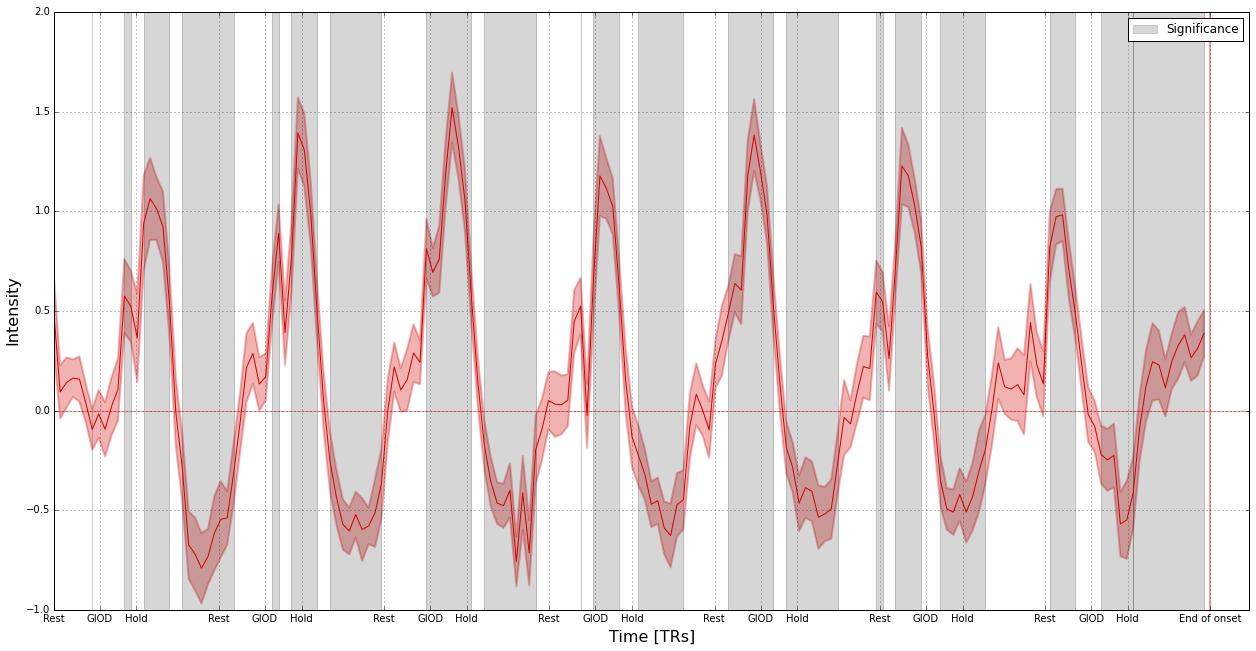

In [50]:
## plot FIR for selected network
#divide the color map by th number of networks 
values = range(scale)
cNorm  = colors.Normalize(vmin=0, vmax=values[-1])
scalarMap = cmx.ScalarMappable(norm=cNorm, cmap=plt.get_cmap('jet'))
colorVal = scalarMap.to_rgba(values[network])

# set varaiables
x = np.array(range(fir_mean.shape[0]))
y = fir_mean[:,network]
std = fir_std[:,network]
y += fir_std[:,network]
tst =fir_test[:,network]

#plot fir mean
plt.figure(figsize=(20, 10))
plt.plot(x, y, 'k', color=colorVal)

#set the timing as in the onset file
ticks_num =[]
ticks_labels = []
for ii in range(1, 8): 
    ticks_num_tmp = (np.array([0, 10,18])+(36*(ii-1)))/1.4
    ticks_num = np.concatenate([ticks_num,ticks_num_tmp])
ticks_num = np.concatenate([ticks_num,np.array([ticks_num[-1]+(18/1.4)])])
ticks_labels = ['Rest','GIOD','Hold']*7 + ['End of onset']

#plot labels and axes
plt.xticks(ticks_num,ticks_labels)
plt.grid()
plt.subplots_adjust(bottom=.12, top=.95, right=.95, left=.12)
plt.xlabel('Time [TRs]', fontsize=16)
plt.ylabel('Intensity', fontsize=16)
plt.xlim(0, 186)
plt.axhline(linewidth=1, color='r',alpha=0.4)
plt.axvline(x=ticks_num[-1], color='r',alpha=0.4, linewidth=2)

# plot std
plt.fill_between(x, y-std, y+std,
    alpha=0.3, edgecolor=colorVal, facecolor=colorVal,linewidth=2,antialiased=True)

# plot significance
def plot_signi(tst):
    """
    plot significance bars
    """
    signi_patch = mpatches.Patch(color='0.2',alpha=0.2,label='Significance')
    plt.legend(handles=[signi_patch])
    increm= 0
    for ind_tst, val_tst in enumerate(tst):
        if increm == 0: 
            if val_tst:
                init_fill = x[ind_tst]
                while tst[ind_tst+increm] and (ind_tst+increm) < len(tst)-1:
                    end_fill = x[ind_tst+increm]
                    increm = increm+1

                plt.axvspan(init_fill, end_fill, facecolor= '0.2', alpha=0.2, linewidth=1)
        else:
            increm=increm-1
            
plot_signi(tst)

##Results
1. Raw (and preprocessed) data shows about 8 seconds time difference compared to the onset file.
2. The FIR plot shows that the 7 blocs ends about 20sec before the onset timing 